# Deep Learning: Keras

## Imports

In [27]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import save_model, load_model

## Carregando o dataset

In [28]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

## Exploração dos dados

In [29]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

## Exibição dos dados

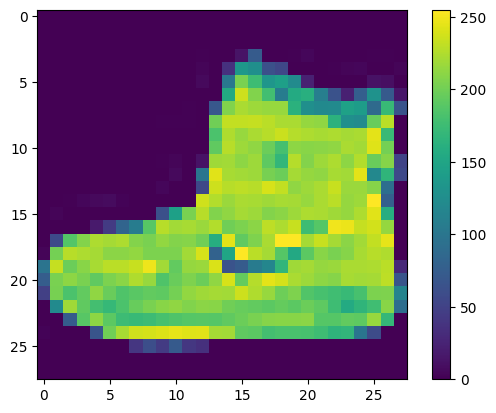

In [30]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']
'''
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''
plt.imshow(imagens_treino[0])
plt.colorbar()

## Normalizando as imagens

In [31]:
imagens_treino = imagens_treino/float(255)

## Criando, compilando, treinando e normalizando o modelo

In [32]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

adam = keras.optimizers.Adam(learning_rate=0.002)

parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                               monitor='val_loss', save_best_only=True)]

modelo.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino,
                       batch_size = 480,
                       epochs=5, validation_split=0.2,
                       callbacks=parando_cedo)

Epoch 1/5
100/100 [==============================] - 3s 21ms/step - loss: 0.6636 - accuracy: 0.7701 - val_loss: 0.4654 - val_accuracy: 0.8349
Epoch 2/5
100/100 [==============================] - 2s 25ms/step - loss: 0.4444 - accuracy: 0.8457 - val_loss: 0.4026 - val_accuracy: 0.8599
Epoch 3/5
100/100 [==============================] - 2s 15ms/step - loss: 0.3948 - accuracy: 0.8589 - val_loss: 0.3755 - val_accuracy: 0.8668
Epoch 4/5
100/100 [==============================] - 2s 16ms/step - loss: 0.3643 - accuracy: 0.8704 - val_loss: 0.3534 - val_accuracy: 0.8758
Epoch 5/5
100/100 [==============================] - 2s 20ms/step - loss: 0.3463 - accuracy: 0.8744 - val_loss: 0.3744 - val_accuracy: 0.8605


## Sumário do modelo

In [33]:
sumario_modelo = modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Pesos da primeira camada Dense

In [ ]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

In [35]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [ ]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)
'''

modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

modelo.layers[1].get_weights()

In [18]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

In [37]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 73.4193 - accuracy: 0.4077 - val_loss: 9.8212 - val_accuracy: 0.7280
Epoch 2/5
1500/1500 [==============================] - 10s 7ms/step - loss: 19.3248 - accuracy: 0.6239 - val_loss: 6.3654 - val_accuracy: 0.7522
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 7.9712 - accuracy: 0.6778 - val_loss: 3.9122 - val_accuracy: 0.7604
Epoch 4/5
1500/1500 [==============================] - 8s 6ms/step - loss: 3.9483 - accuracy: 0.7100 - val_loss: 2.3175 - val_accuracy: 0.7383
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 2.1431 - accuracy: 0.7376 - val_loss: 1.3211 - val_accuracy: 0.7968


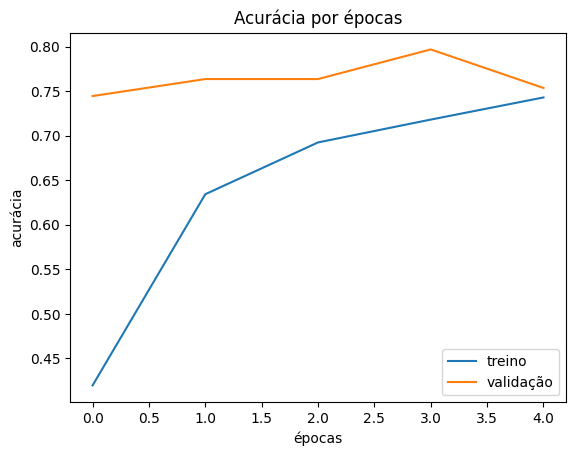

In [14]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

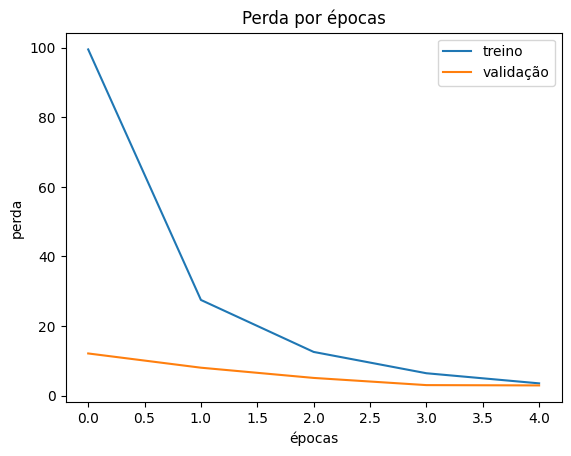

In [24]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [ ]:
modelo.get_config()

## Salvando e carregando o modelo treinado

In [19]:
save_model(modelo, 'modelo.keras')

modelo_salvo = load_model('modelo.keras')

## Visualizando as acurácias de treino e validação por época

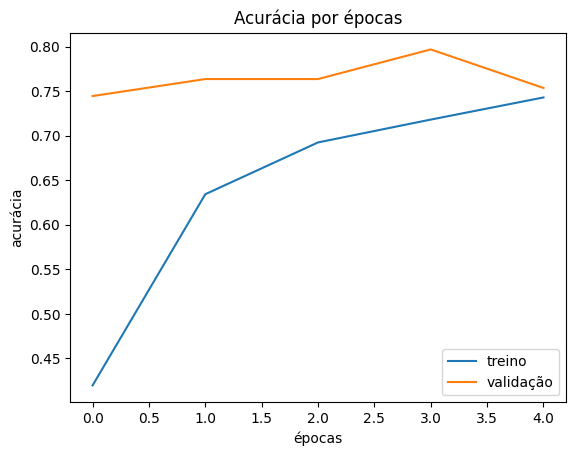

In [20]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

## Visualizando as perdas de treino e validação por época

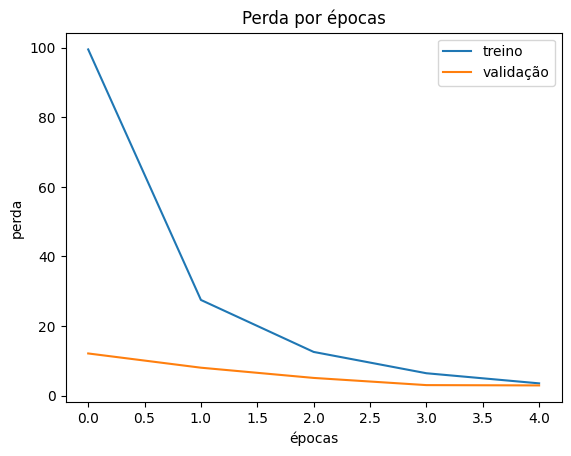

In [21]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

## Testando o modelo e o modelo salva

In [22]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 1s 2ms/step
resultado teste: 8
número da imagem de teste: 2
313/313 [==============================] - 1s 2ms/step
resultado teste modelo salvo: 8
número da imagem de teste: 2


## Avaliando o modelo

In [23]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 4ms/step - loss: 33623.8477 - accuracy: 0.1000
Perda do teste: 33623.84765625
Acurácia do teste: 0.10000000149011612
